# TP noté du lundi 1er avril 2019 - Thomas DAILLY

In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline

In [3]:
#Importation des données :

pen_tes = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", 
                          header=None)
pen_tra = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", 
                          header=None)
pen = pen_tes.copy().append(pen_tra, ignore_index = True)
print(pen.shape)
pen.head()

(10992, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [5]:
#On crée le vecteur correspondant aux noms des variables

a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
print(a)

['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'chiffre']


In [6]:
#On renomme ainsi les colonnes de notre jeu de données grâce à ce vecteur

pen.columns = a
pen.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [18]:
#On construit ensuite une variable contenant les chiffres mais en tant que chaîne de caractères


pen = pen.assign(chiffre_str = [str(c) for c in pen.chiffre])
pen.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre,chiffre_str
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9,9


In [9]:
#Nous allons pouvoir commencer à répondre aux questions :

#### Question 1

In [32]:
pen.groupby(['chiffre_str']).mean()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre
chiffre_str,,,,,,,,,,,,,,,,,
0,35.372703,86.063867,11.577428,58.310586,14.935258,19.600175,51.172353,7.293963,85.941382,31.301837,89.294838,68.492563,59.011374,89.312336,22.096238,75.237970,0.0
1,14.702537,61.392826,44.351706,77.935258,69.857393,89.509186,77.496938,79.800525,67.637795,54.059493,47.801400,32.657918,44.601050,16.157480,59.905512,1.382327,1.0
2,18.392483,76.949301,42.130245,99.387238,67.460664,79.761364,51.276224,46.046329,19.831294,19.378497,11.639860,9.093531,53.057692,5.246503,98.710664,4.171329,2.0
3,24.784834,84.060664,56.659716,99.519431,86.644550,84.687204,64.525118,60.589573,82.128910,43.217062,90.882464,17.257820,50.013270,2.275829,3.468246,6.244550,3.0
4,42.958042,99.540210,22.125874,79.378497,5.752622,51.158217,42.833916,40.470280,85.103147,49.561189,86.298951,59.722902,70.989510,31.452797,62.603147,0.000000,4.0
5,41.239810,90.943128,42.598104,75.831280,57.313744,59.179147,36.459716,29.355450,26.183886,33.152607,37.636019,50.236019,42.831280,57.687204,59.459716,60.308057,5.0
6,87.520833,98.719697,51.753788,86.724432,20.709280,58.482955,6.942235,26.928030,32.605114,3.143939,81.108902,11.018939,61.571970,30.538826,11.000000,23.353220,6.0
7,3.497373,91.008757,45.371278,98.248687,78.846760,80.758319,71.266200,47.467601,52.729422,14.933450,33.603327,18.471103,39.511384,33.798599,81.143608,34.306480,7.0
8,56.948815,82.080569,39.830332,79.615166,51.814218,51.927962,50.564929,24.221801,35.248341,17.066351,39.926066,36.896682,67.784834,68.488152,48.997156,81.403791,8.0


#### Question 2

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8']
['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8']


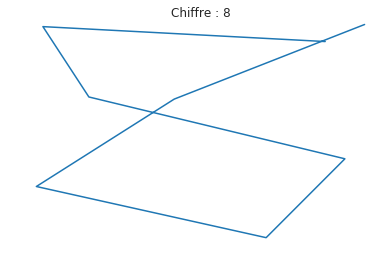

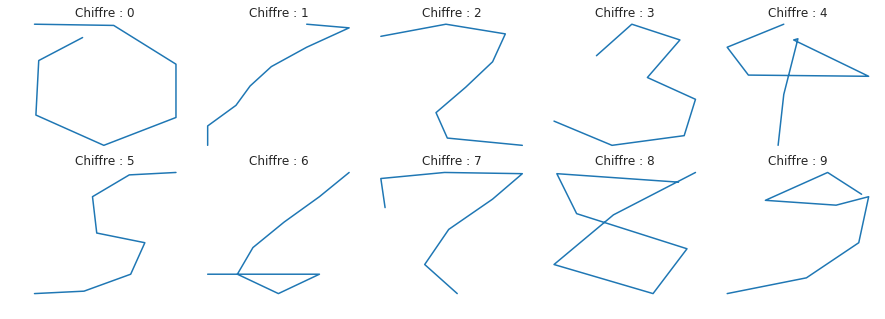

In [36]:
#On reprend le code qui nous est donné

xN = ["x" + str(i + 1) for i in range(8)]
print(xN)
yN = ["y" + str(i + 1) for i in range(8)]
print(yN)
xyN = [a + b for a,b in zip(["x", "y"] * 8, [str(i + 1) for i in range(8) for j in range(2)])]
print(xyN)

def dessin(p, x, y, chiffre):
    p.plot(x, y)
    p.set_title("Chiffre : " + str(chiffre))
    p.axis("off")
    p.set_xlim([-1, 101])
    p.set_ylim([-1, 101])

fig, ax = plt.subplots()
dessin(ax, x, y, chiffre)


sub = [pen.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]


subxyc = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, subxyc[i][0], subxyc[i][1], subxyc[i][2])

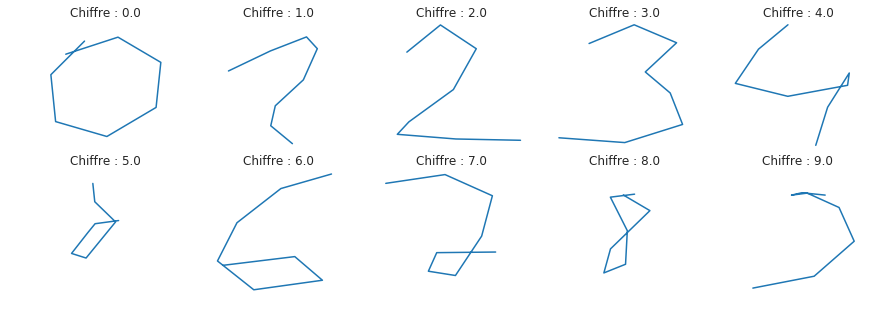

In [44]:
#On répond maintenant à la question en représentant le tracé des chiffres moyens

coord_moy = pen.groupby(['chiffre_str']).mean()
sub = [coord_moy.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]

subxyc = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, subxyc[i][0], subxyc[i][1], subxyc[i][2])

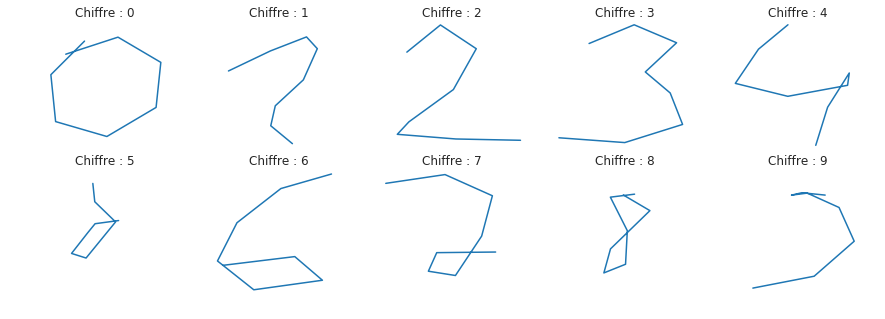

In [94]:
# On remarque sur les figures ci-dessus que les chiffres sont au format "float".
# On peut forcer la conversion en entier de la variable "chiffre" dans la fonction "dessin()" afin d'obtenir les numéros
# des chiffres.

def dessin(p, x, y, chiffre):
    p.plot(x, y)
    p.set_title("Chiffre : " + str(int(chiffre)))
    p.axis("off")
    p.set_xlim([-1, 101])
    p.set_ylim([-1, 101])
    

        
# On exécute alors de nouveau le code        

coord_moy = pen.groupby(['chiffre_str']).mean()
sub = [coord_moy.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]

subxyc = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, subxyc[i][0], subxyc[i][1], subxyc[i][2])

#### Question 3

In [120]:
# On commence par importer les packages dont nous aurons besoin pour réaliser une ACP.

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# On créé d'abord un objet (nommé ici pca) qui va contenir le résultat de l'ACP
# Ensuite, on ajuste (fit en anglais) sur des données avec la fonction fit() de l'objet précédemment créé.
# Dans cette fonction, nous devons donc passer les données à utiliser.

pca = PCA()
ACP_stand = pca.fit(scale(pen[pen.columns[:16]]))
ACP = pca.fit(pen[pen.columns[:16]])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


Maintenant que nous avons créé les deux objets représentant l'ACP standardisée (ACP_stand) et l'ACP non standardisée (ACP), nous allons pouvoir construire deux tableaux récapitulatifs des deux méthodes pour mieux les comparer


In [121]:
# ACP standardisée

eig1 = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(16)], 
        "Valeur propre" : ACP_stand.explained_variance_,
        "% variance expliquée" : numpy.round(ACP_stand.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(ACP_stand.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig1

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4213.712943,28.0,28.0
1,Dim2,3702.068803,25.0,53.0
2,Dim3,2285.553002,15.0,69.0
3,Dim4,1341.264269,9.0,78.0
4,Dim5,861.922075,6.0,83.0
5,Dim6,718.262854,5.0,88.0
6,Dim7,457.338180,3.0,91.0
7,Dim8,397.591843,3.0,94.0
8,Dim9,286.790074,2.0,96.0
9,Dim10,204.274245,1.0,97.0


In [122]:
# ACP non standardisée

eig2 = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(16)], 
        "Valeur propre" : ACP.explained_variance_,
        "% variance expliquée" : numpy.round(ACP.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(ACP.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig2

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4213.712943,28.0,28.0
1,Dim2,3702.068803,25.0,53.0
2,Dim3,2285.553002,15.0,69.0
3,Dim4,1341.264269,9.0,78.0
4,Dim5,861.922075,6.0,83.0
5,Dim6,718.262854,5.0,88.0
6,Dim7,457.338180,3.0,91.0
7,Dim8,397.591843,3.0,94.0
8,Dim9,286.790074,2.0,96.0
9,Dim10,204.274245,1.0,97.0


In [126]:
ACP == ACP_stand

True

In [127]:
# On constate donc que les deux ACP sont identiques, la standardisation ne change rien ici.

On peut maintenant représenter graphiquement ces proportions de variances expliquées (qu'on passe en pourcentage par convenance).

Text(0.5, 0.98, 'Variance expliquée par dimension')

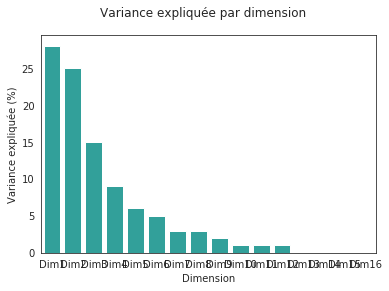

In [135]:
g_eig1 = seaborn.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = eig1)
g_eig1.set(ylabel = "Variance expliquée (%)")
g_eig1.figure.suptitle("Variance expliquée par dimension")

#### Question 4

On remarque sur le graphique précédent qu'on arrive à expliquer plus de la moitié de la variance des données avec seulement 2 variables sur les 16 mises à notre disposition (ce qui est un très bon résultat). Nous allons donc maintenant calculer les coordonnées de `pen` sur les dimensions à l'aide de la fonction `transform()` de l'objet `pca`.

In [138]:
pen_pca = pca.transform(pen[pen.columns[:16]])

In [142]:
# Transformation en DataFrame pandas en ne gardant que les deux premières dimensions
pen_pca_df = pandas.DataFrame({
    "Dim1" : pen_pca[:,0], 
    "Dim2" : pen_pca[:,1],
    "chiffre" : pen.chiffre
})

# Résultat (premières lignes)
pen_pca_df.head()

,Dim1,Dim2,chiffre
0,75.160614,48.571697,8
1,59.793223,50.843860,8
2,125.948695,-38.871279,8
3,-69.844798,-80.122477,9
4,-61.898735,-67.181088,9


Il est maintenant possible de représenter les données sur le premier plan factoriel, en ajoutant bien évidemment l'information sur les chiffres.

Text(0.5, 0.98, 'Premier plan factoriel')

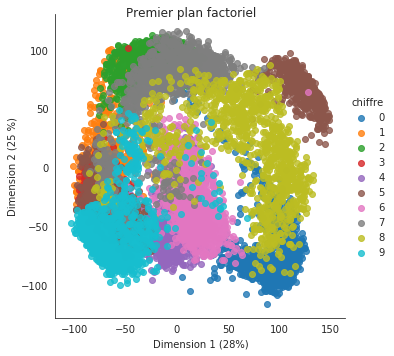

In [144]:
# Représentation des chiffres sur le plan factoriel sur un seul graphique

g_pca = seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", data = pen_pca_df, fit_reg = False)
g_pca.set(xlabel = "Dimension 1 (28%)", ylabel = "Dimension 2 (25 %)")
g_pca.fig.suptitle("Premier plan factoriel")

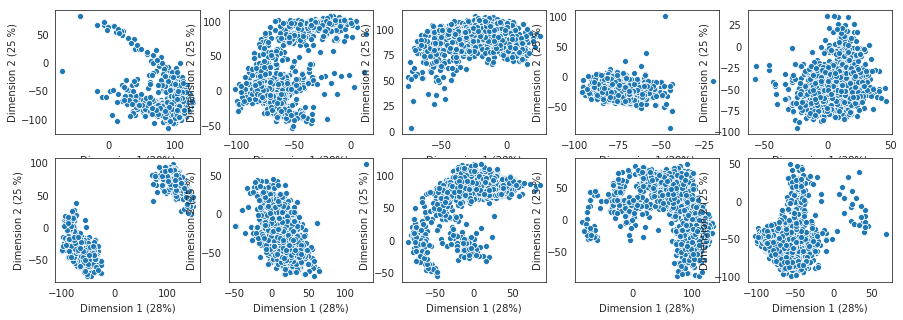

In [187]:
# Représentation des chiffres sur le plan factoriel avec un graphique par chiffre, sur la même figure

fig = plt.figure(figsize = (15, 5))
for i in range(10):
    fig.add_subplot(2, 5, i + 1)
    g_pca = seaborn.scatterplot("Dim1", "Dim2", data = pen_pca_df[pen_pca_df.chiffre==i])
    g_pca.set(xlabel = "Dimension 1 (28%)", ylabel = "Dimension 2 (25 %)")

#### Question 5

Nous utilisons ici la fonction `DBSCAN()` du sous-module `cluster`.

In [197]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = .7, min_samples = 3)
db.fit(scale(pen[pen.columns[:16]]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=None, p=None)

In [199]:
# On obtient ainsi la classe pour chaque individu par l'intermédiaire de l'objet `labels_`

db.labels_

array([ 23,  -1,  -1, ...,   5, 128,  -1])

In [205]:
# On peut alors faire un tableau récapitulatif des effectifs par classes

eff = numpy.unique(db.labels_, return_counts = True)
pandas.DataFrame({
    "Classe" : eff[0],
    "Effectif" : eff[1]
})

,Classe,Effectif
0,-1,4719
1,0,62
2,1,3
3,2,24
4,3,788
5,4,1006
6,5,101
7,6,799
8,7,542
9,8,769


In [206]:
# Par cette méthode, on distingue donc 4719 outliers dans notre jeu de données.
# Le reste des valeurs ont été classées parmi 221 classes différentes.

In [209]:
def classification(donnees, epsilon, min_pts):
    db = DBSCAN(eps = epsilon, min_samples = min_pts)
    db.fit(scale(donnees[donnees.columns])
    eff = numpy.unique(db.labels_, return_counts = True)
    pandas.DataFrame({
        "Classe" : eff[0],
        "Effectif" : eff[1]
    }))
    donnees_pca_db = donnees_pca_df.assign(Labels = db.labels_)
    seaborn.lmplot("Dim1", "Dim2", hue = "Labels", col = donnees.columns, data = donnees_pca_db, fit_reg = False)

SyntaxError: invalid syntax (<ipython-input-209-086122185d0e>, line 4)